In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset from GitHub
print("1. Loading the dataset...")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("\nDataset loaded successfully. Here's a quick look at the first 5 rows:")
print(df.head())
print("\n--- Initial Dataset Information ---")
print(df.info())

1. Loading the dataset...

Dataset loaded successfully. Here's a quick look at the first 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0   

In [3]:
# --- Section 2: Data Cleaning and Preprocessing ---
print("\n2. Data Cleaning and Preprocessing...")

# Drop columns that are not useful for the model
# Based on the data info, these columns are either identifiers or have too many missing values.
print("Dropping 'PassengerId', 'Name', 'Ticket', and 'Cabin' as they are not useful for modeling...")
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



2. Data Cleaning and Preprocessing...
Dropping 'PassengerId', 'Name', 'Ticket', and 'Cabin' as they are not useful for modeling...


In [4]:
# Handle missing values
# 'Age' has 714 non-null values, so we'll fill the missing ones with the median.
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_15988\2519283560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:

# 'Embarked' has 889 non-null values, so we'll fill the missing ones with the most frequent value (mode).
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_15988\1980280877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [6]:
# Encode categorical features
# 'Sex' and 'Embarked' are categorical and need to be converted to numerical format for the SVM model.
print("Encoding categorical features 'Sex' and 'Embarked'...")
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

Encoding categorical features 'Sex' and 'Embarked'...


In [7]:
# Separate features (X) and the target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
# Scale numerical features
# SVM is highly sensitive to the scale of features. It's crucial to standardize them.
print("Scaling numerical features 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare'...")
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("\nPreprocessing complete. The data is now ready for modeling.")


Scaling numerical features 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare'...

Preprocessing complete. The data is now ready for modeling.


In [9]:
# --- Section 3: Splitting the Data and Model Training ---
print("\n3. Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


3. Splitting the data into training and testing sets...
Training set size: 712 samples
Testing set size: 179 samples


In [10]:
print("\n4. Training the SVM model...")
# Initialize the SVM classifier with a Radial Basis Function (RBF) kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)
print("Model training complete.")


4. Training the SVM model...
Model training complete.


In [11]:
# --- Section 4: Model Evaluation ---
print("\n5. Evaluating the model's performance on the test set...")

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


5. Evaluating the model's performance on the test set...

Model Accuracy: 0.8156



--- Confusion Matrix ---


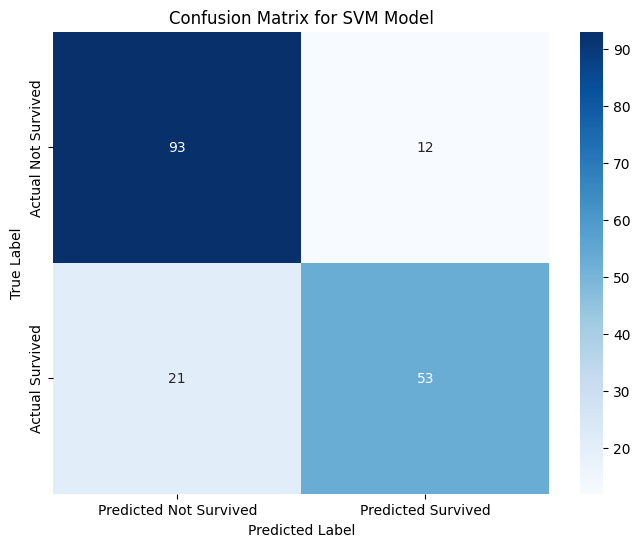

In [12]:
# Display the Confusion Matrix to visualize the model's predictions
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
# Display the detailed Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n🎉 The end-to-end process is complete!")


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


🎉 The end-to-end process is complete!
